### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%imaplotlib inline

UsageError: Line magic function `%imaplotlib` not found.


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [4]:
# 유방암 데이터 로딩
cancer = load_breast_cancer()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 정규화
# 평균 :0 , 분산 :  1로 원래 데이터 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# 데이터 분리
X_train, X_test, y_train, y_test =\
train_test_split(
      data_scaled
    , cancer.target
    , test_size = 0.3
    , random_state= 0
)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 모델 학습/예측(분류)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 평가(AUC, 정확도)
accu = accuracy_score(y_test, lr_preds)
auc = roc_auc_score(y_test, lr_preds)
print('정확도 : {:.3f}'.format(accu))
print('AUC score : {:.3f}'.format(auc))

정확도 : 0.977
AUC score : 0.972


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 파라미터 튜닝 (GridSearchCV)
#1. patameter 설정
params = {
      'penalty' : ['l2','l1']
    , 'C' : [0.01, 0.1, 1, 5, 10] # 1/alpha   
}

#2. 적용할 모델 객체 생성 : Logistic Regression
lr_clf = LogisticRegression()

#3. GridSearch object create
grid_clf = GridSearchCV(
      lr_clf
    , param_grid=params
    , scoring='accuracy'
    , cv=3
)

grid_clf.fit(data_scaled, cancer.target)

b_param = grid_clf.best_params_
b_accu = grid_clf.best_score_
out_str = 'Best Param : {0:}, Best Accu: {1:.3f}'
print(out_str.format(b_param, b_accu))

Best Param : {'C': 1, 'penalty': 'l2'}, Best Accu: 0.975


C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWar

### Regression Tree Predict
- Boston House Price 

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [20]:
# 데이터 셋 생성
# 1. 데이터 로딩
boston = load_boston()
# 2. DataFrame 생성
boston_df = pd.DataFrame(
      boston.data
    , columns=boston.feature_names
)
boston_df['PRICE'] = boston.target
# 3. 데이터, 답 생성
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)

In [24]:
# 모델 생성
rf_reg = RandomForestRegressor(
      n_estimators=1000
    , random_state=0
)

# 교차검증
neg_mse_scores = cross_val_score(
      rf_reg
    , X_data
    , y_target
    , scoring='neg_mean_squared_error' # 평가지표 - 점수
    , cv=5 
)
# 결과 처리
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 결과 출력
print('5 교차 검증의 개별 RMSE : ', np.round(rmse_scores,2))
print('평균 RMSE : ', np.round(avg_rmse,2) )

5 교차 검증의 개별 RMSE :  [2.81 3.63 4.54 6.8  4.34]
평균 RMSE :  4.42


In [30]:
# DT, GB, XGB, LGBM 반복 처리 -> cross_val_score 출력

def get_model_cv_prediction(model, X_data_p, y_target_p):
    neg_scores = cross_val_score(model, X_data_p, y_target_p
                                , scoring='neg_mean_squared_error'
                                , cv=5
                                )
    rmse_scores = np.sqrt(-1 * neg_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__, '#####')
    print('AVG RMSE : {0:.3f}'.format(avg_rmse))

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
# 5개 모델 객체 생성
dt_reg = DecisionTreeRegressor(max_depth=4, random_state=0)
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=0)
gb_reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)
# 교차검증 처리

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
AVG RMSE : 5.978
##### RandomForestRegressor #####
AVG RMSE : 4.423
##### GradientBoostingRegressor #####
AVG RMSE : 4.269
[12:45:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
AVG RMSE : 4.089
##### LGBMRegressor #####
AVG RMSE : 4.646


### 시각화

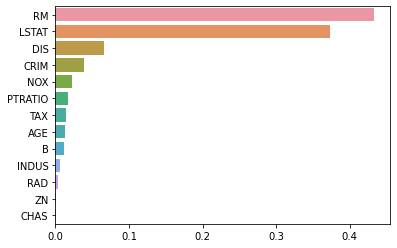

In [35]:
# max_depth
# LinearRegression, max_depth=2, max_depth=7 시각화
# 피처(컬럼) 중요도
import seaborn as sns

# 1. 학습 -> 중요도 추출
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

# 2. 중요도 추출 -> sort => Series.sort_values()
# rf_reg.feature_importances_ # 피처 중요도 값
feature_ser = pd.Series(
    data=rf_reg.feature_importances_ # 피처 중요도 값
    , index=X_data.columns # df의 컬럼명
)
feature_ser_desc = feature_ser.sort_values(ascending=False)

# 시각화
sns.barplot(
      x=feature_ser_desc # 중요도 값
    , y=feature_ser_desc.index # 피처명 
)



Sample shape :  (100, 2)


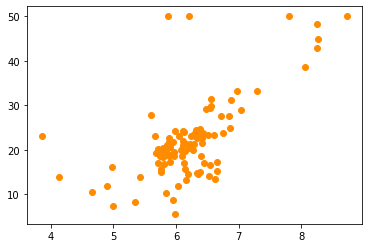

In [39]:
# RM feature(가격 영향을 주었다) => data, 답 : PRICE
# 100개 추출 -> 산점도(분포확인)
boston_df_sample = boston_df[['RM','PRICE']]
boston_df_sample = boston_df_sample.sample(
      n=100 # 추출할 데이터 개수
    , random_state=0
)

print('Sample shape : ', boston_df_sample.shape)

# 산점도(분포확인)
plt.figure()
plt.scatter(
      boston_df_sample.RM
    , boston_df_sample.PRICE
    , c='darkorange'
)


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 1. 모델 객체 3개 생성
lr_reg = LinearRegression()
dt_reg_depth_2 = DecisionTreeRegressor(max_depth=2)
dt_reg_depth_7 = DecisionTreeRegressor(max_depth=7)



In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 1. 모델 객체 3개 생성
lr_reg = LinearRegression()
dt_reg_depth_2 = DecisionTreeRegressor(max_depth=2)
dt_reg_depth_7 = DecisionTreeRegressor(max_depth=7)

In [64]:
# Test Data create
# X_test = np.linspace(4.5, 8,5, 100) : 100개 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

In [65]:
boston_df_sample.head(3)

,RM,PRICE
329,6.333,22.6
371,6.216,50.0
219,6.373,23.0


In [66]:
# Train Data, Label 추출 -> 2차원 변환=> 학습에 사용
X_train = boston_df_sample.RM.values.reshape(-1,1)
y_train = boston_df_sample.PRICE.values.reshape(-1,1)

# Train Data, Label 추출 -> 2차원 변환
X_train = boston_df_sample['RM'].values.reshape(-1,1)
y_train = boston_df_sample['PRICE'].values.reshape(-1,1)

In [67]:
# 학습
lr_reg.fit(X_train, y_train)
dt_reg_depth_2.fit(X_train, y_train)
dt_reg_depth_7.fit(X_train, y_train)
# 예측 추출
lr_pred = lr_reg.predict(X_test)
dt2_pred = dt_reg_depth_2.predict(X_test)
dt7_pred = dt_reg_depth_7.predict(X_test)



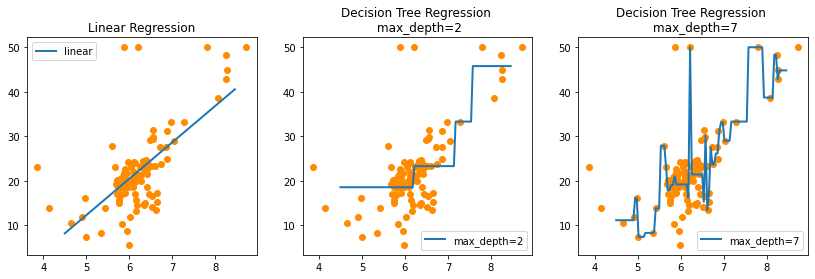

In [75]:
# 시각화
fig, (ax1,ax2,ax3) = plt.subplots(
      figsize=(14,4)
    , nrows=1
    , ncols=3
)

# LinearRegression 첫번째(ax1) 축에 적용
ax1.set_title("Linear Regression")
# 1, 산점도 (데이터 분포)
ax1.scatter(
    boston_df_sample.RM
    , boston_df_sample.PRICE
    , c='darkorange'
)
# 2. 회귀선 표시
ax1.plot(X_test, lr_pred, lw=2, label='linear')
ax1.legend()

# Decision Tree Regression \n max_depth=2 (ax2) 축에 적용
ax2.set_title("Decision Tree Regression \n max_depth=2")
ax2.scatter(
    boston_df_sample.RM
    , boston_df_sample.PRICE
    , c='darkorange'
)
ax2.plot(X_test, dt2_pred, lw=2, label='max_depth=2')
ax2.legend()

# Decision Tree Regression \n max_depth=7 (ax3) 축에 적용
ax3.set_title("Decision Tree Regression \n max_depth=7")
ax3.scatter(
    boston_df_sample.RM
    , boston_df_sample.PRICE
    , c='darkorange'
)
ax3.plot(X_test, dt7_pred, lw=2, label='max_depth=7')
ax3.legend()